# This is the main programming part of CS591 Project

In [353]:
import os
import urllib
import pickle
import pprint
import io
username2brand = pickle.load(open('username2brand.pkl','rb'))
brand2counts = pickle.load(open('brand2counts.pkl', 'rb'))
id2brand = pickle.load(open('id2brand.pkl','rb'))

# link the username with the brands list

In [2]:
len(list(brand2counts.keys()))

1072

# link the brands to accounts of twitter


In [3]:
#brand2counts

In [4]:
len(id2brand)

1072

In [5]:
# above is the total number of brands
# within the following steps we are heading to print the most popular brand's top follower accounts
print(list(brand2counts.keys())[0], sorted(list(brand2counts.values())[0].items(), key=lambda x: -x[1])[:5])

15650816 [(35764757, 231), (15846407, 217), (25525507, 203), (90420314, 186), (34381878, 177)]


In [6]:
# Then the next step is to read through all the brands' demographics
import json
username2demographics = dict()
for line in open('brands.json','rt'):
    js = json.loads(line)
    username2demographics[js['twitter'].lower()] = js
print("Read the total number of demographics %d" %(len(username2demographics)))

Read the total number of demographics 1428


In [7]:
# Add each demographics into the brands' dictionary
count = 0
for username, brand in username2brand.items():
    if username in username2demographics:
        brand['demo'] = username2demographics[username]
        id2brand[brand['_id']]['demo'] = username2demographics[username]
        count += 1
    else:
        print('no demographics for %s' %username)
print('The total found number for %d brands' %count)

no demographics for 140proof
no demographics for foxsports
no demographics for jaltucher
no demographics for wgtc_site
no demographics for selectism
no demographics for bridalguidemag
no demographics for urbandecay
no demographics for veria_living
no demographics for 247sports
no demographics for sds
no demographics for untappedcities
no demographics for eatingrules
no demographics for pregnancyorg
no demographics for wallstcs
no demographics for ballerstatus
no demographics for emsworldnews
no demographics for natgeo
no demographics for visitkc
no demographics for cincinnatiusa
no demographics for nofilmschool
no demographics for gametrailers
no demographics for cookieandkate
no demographics for simplyrecipes
no demographics for wayfair
no demographics for chicago_reader
no demographics for okayplayer
no demographics for nyulocal
no demographics for maximmag
no demographics for snapwidget
no demographics for thelmagazine
no demographics for boardingarea
no demographics for giantfoodst

In [8]:
# then we need to set in the matrix that self-self cell counts shall equal to zero.
for brand in brand2counts:
    brand2counts[brand][brand] = 0.
# Now, the brand id shall not appear in the counting list.
print(list(brand2counts.keys())[0], sorted(list(brand2counts.values())[0].items(), key=lambda x: -x[1])[:5])

15650816 [(35764757, 231), (15846407, 217), (25525507, 203), (90420314, 186), (34381878, 177)]


Then the next step is to plot the descriptive stats of the datasets
the x axis is the number of friends, y axis is the number of followers for each brand
Then we can plot the number of followers for each feature.


Populating the interactive namespace from numpy and matplotlib
Total number of neighbors: 70952109341


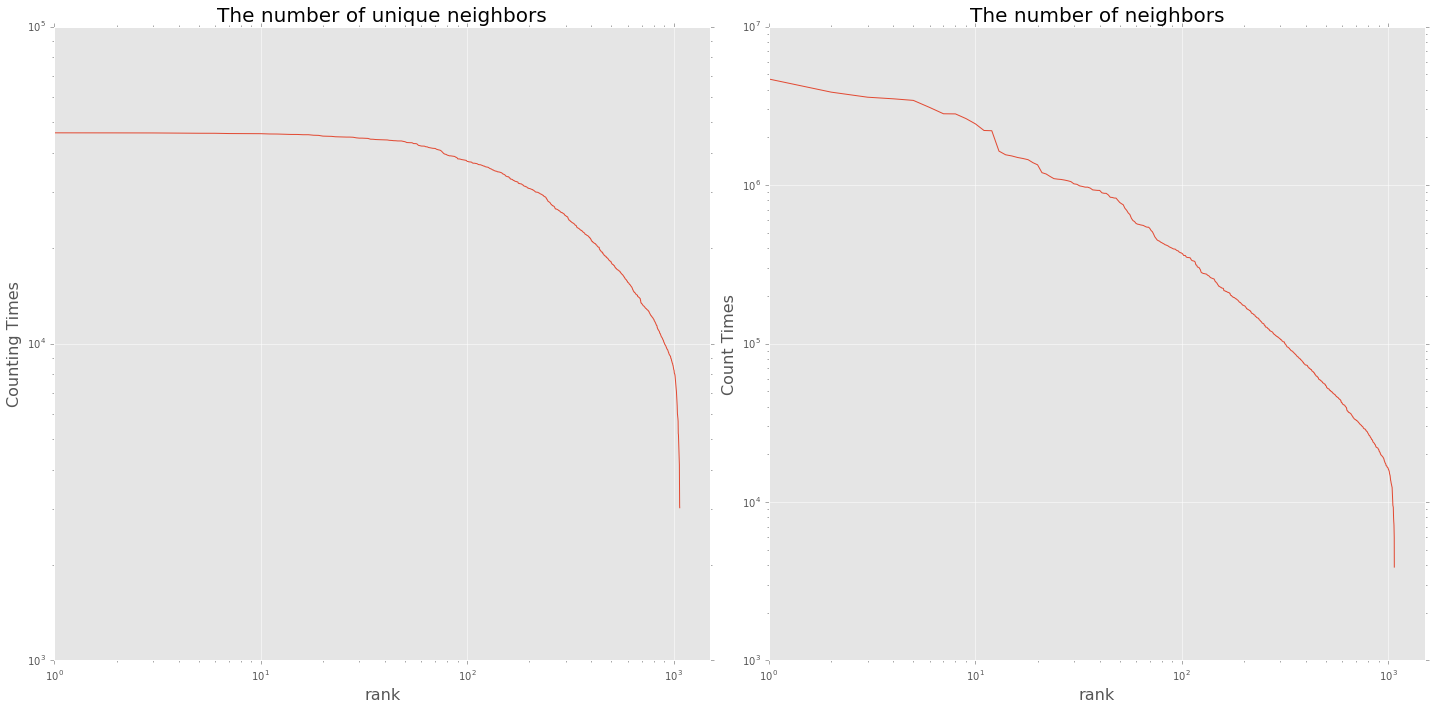

In [10]:
import matplotlib.pyplot as plt
%pylab inline --no-import-all
plt.style.use('ggplot')
def plot_data_figs_1and2():
    figure, plots = plt.subplots(1, 2, figsize = (20,10), sharex = True, sharey= False)
    unique_friends = sorted([len(brd.keys()) for brd in brand2counts.values()], reverse= True)
    # first plot the first figure
    plots[0].plot(unique_friends)
    plots[0].set_xscale('log')
    plots[0].set_yscale('log')
    plots[0].set_title('The number of unique neighbors', size = 20)
    
    # then set up data plot for neighbor links
    brandcounts = sorted([sum(brd.values()) for brd in brand2counts.values()], reverse = True)
    print('Total number of neighbors: %d' % sum(brand2counts))
    plots[1].plot(brandcounts)
    plots[1].set_xscale('log')
    plots[1].set_yscale('log')
    plots[1].set_title('The number of neighbors', size = 20)
    plots[1].set_xlim((0, 1500))
    plots[0].set_xlabel('rank', size = 16)
    plots[1].set_xlabel('rank', size = 16)
    plots[0].set_ylabel('Counting Times', size = 16)
    plots[1].set_ylabel('Count Times', size = 16)
    figure.tight_layout()
    plt.savefig('Figure2_1.png')
    
plot_data_figs_1and2()

In [11]:
# id of lifehacker is 7144422
import operator
tempt_dict = brand2counts[7144422]
sorted_x = sorted(tempt_dict.items(), key=operator.itemgetter(1), reverse=True)
len(sorted_x)



45665

In [12]:
count = 0
for i in range(len(sorted_x)):
    if sorted_x[i][0] in list(id2brand.keys()):
        print(sorted_x[i][0])
        print(id2brand[sorted_x[i][0]])
        count += 1
        if count >= 3:
            break

2890961
{'brand_name': 'Gizmodo', 'total': 5000, 'is_taken': False, '_id': 2890961, 'demo': {'Other': '1%', 'brand': 'gizmodo.com', 'Female 55-64': '1%', 'Male < 18': '10%', 'Female 35-44': '3%', 'Inactive': '27%', '18-24': '15%', '$50-100k': '32%', 'Female 25-34': '4%', 'African American': '5%', 'Republican': '16%', 'Caucasian': '76%', 'Male 18-24': '13%', 'Male 45-54': '10%', 'No Kids': '52%', 'Male 65+': '1%', 'Has Kids': '48%', 'Female < 18': '2%', '$150k+': '11%', '65+': '1%', 'Male 55-64': '3%', 'Somewhat Active': '48%', 'Active': '26%', 'Independent': '54%', '< 18': '12%', '$0-50k': '40%', 'Male 25-34': '26%', '55-64': '4%', 'No College': '25%', 'College': '55%', 'Hispanic': '11%', 'Female': '15%', '25-34': '31%', 'Female 65+': '0%', '35-44': '24%', 'Female 45-54': '2%', 'Female 18-24': '2%', 'Male': '85%', 'Asian': '7%', 'Democrat': '30%', '45-54': '12%', 'twitter': 'gizmodo', 'Grad School': '19%', 'Male 35-44': '21%', '$100-150k': '16%'}, 'last_cur': 1475200686933340050, 'max'

In [354]:
# Then we need to normalize the data and create sparse matrix
import numpy as np
from numpy import array as npa
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import scale

brand_ids = npa(brand2counts.keys())
vec = DictVectorizer()
X = vec.fit_transform(brand2counts.values())

In [355]:
print(X[0])

  (0, 0)	20.0
  (0, 1)	15.0
  (0, 2)	18.0
  (0, 4)	1.0
  (0, 5)	3.0
  (0, 6)	3.0
  (0, 9)	3.0
  (0, 10)	1.0
  (0, 11)	8.0
  (0, 13)	6.0
  (0, 14)	5.0
  (0, 15)	3.0
  (0, 17)	6.0
  (0, 18)	3.0
  (0, 19)	1.0
  (0, 20)	1.0
  (0, 24)	3.0
  (0, 26)	16.0
  (0, 27)	2.0
  (0, 28)	1.0
  (0, 29)	2.0
  (0, 31)	3.0
  (0, 32)	1.0
  (0, 33)	1.0
  (0, 34)	4.0
  :	:
  (0, 46553)	5.0
  (0, 46554)	1.0
  (0, 46555)	18.0
  (0, 46556)	3.0
  (0, 46559)	1.0
  (0, 46562)	4.0
  (0, 46565)	3.0
  (0, 46567)	2.0
  (0, 46568)	4.0
  (0, 46573)	1.0
  (0, 46577)	1.0
  (0, 46580)	2.0
  (0, 46583)	8.0
  (0, 46584)	2.0
  (0, 46587)	1.0
  (0, 46592)	1.0
  (0, 46604)	3.0
  (0, 46613)	1.0
  (0, 46618)	1.0
  (0, 46621)	3.0
  (0, 46622)	4.0
  (0, 46631)	3.0
  (0, 46640)	2.0
  (0, 46642)	1.0
  (0, 46648)	2.0


In [356]:
# By row we do the normalize
from sklearn.preprocessing import normalize
print('%d total friend links' % X.sum())
# do the L1 normalize
X = normalize(X, norm = 'l1', axis = 1)
print(X[0])

177997246 total friend links
  (0, 0)	0.000156586416128
  (0, 1)	0.000117439812096
  (0, 2)	0.000140927774516
  (0, 4)	7.82932080642e-06
  (0, 5)	2.34879624193e-05
  (0, 6)	2.34879624193e-05
  (0, 9)	2.34879624193e-05
  (0, 10)	7.82932080642e-06
  (0, 11)	6.26345664514e-05
  (0, 13)	4.69759248385e-05
  (0, 14)	3.91466040321e-05
  (0, 15)	2.34879624193e-05
  (0, 17)	4.69759248385e-05
  (0, 18)	2.34879624193e-05
  (0, 19)	7.82932080642e-06
  (0, 20)	7.82932080642e-06
  (0, 24)	2.34879624193e-05
  (0, 26)	0.000125269132903
  (0, 27)	1.56586416128e-05
  (0, 28)	7.82932080642e-06
  (0, 29)	1.56586416128e-05
  (0, 31)	2.34879624193e-05
  (0, 32)	7.82932080642e-06
  (0, 33)	7.82932080642e-06
  (0, 34)	3.13172832257e-05
  :	:
  (0, 46553)	3.91466040321e-05
  (0, 46554)	7.82932080642e-06
  (0, 46555)	0.000140927774516
  (0, 46556)	2.34879624193e-05
  (0, 46559)	7.82932080642e-06
  (0, 46562)	3.13172832257e-05
  (0, 46565)	2.34879624193e-05
  (0, 46567)	1.56586416128e-05
  (0, 46568)	3.131728322

In [357]:
X = X.toarray()

# Text Features

As for each tweet, we perform the standard tokenization, and the non-internal punctuation, converting to the lower case.

In [358]:
# read a map from userid->feature vector, one per follower.
import gzip
from itertools import groupby
import json
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string

def tokenize(text, lc=True, collapse_hashtags=False, collapse_mentions=False,
             collapse_urls=True, limit_repeats=True,  collapse_digits=True,
             retain_punc_toks=False, rt_prefix=False, tokpairs=False):
    punc_re = '[' + re.escape(string.punctuation) + ']'
    text = text.lower() if lc else text
    if collapse_hashtags:
        text = re.sub('#\S+', 'THIS_IS_A_HASHTAG', text)
    else:
        text = re.sub('#(\S+)', r'HASHTAG_\1', text)
    if collapse_mentions:
        text = re.sub('@\S+', 'THIS_IS_A_MENTION', text)
    else:
        text = re.sub('@(\S+)', r'MENTION_\1', text)
    if collapse_urls:
        text = re.sub('http\S+', 'THIS_IS_A_URL', text)
    if limit_repeats:
        text = re.sub(r'(.)\1\1\1+', r'\1', text)
    if collapse_digits:
        text = re.sub(r'[0-9]', '9', text)
    toks = []
    for tok in text.split():
        tok = re.sub(r'^(' + punc_re + '+)', r'\1 ', tok)
        tok = re.sub(r'(' + punc_re + '+)$', r' \1', tok)
        for subtok in tok.split():
            if retain_punc_toks or re.search('\w', subtok):
                toks.append(subtok)
    if rt_prefix:
        rt_text = 'rt' if lc else 'RT'
        if rt_text in toks:
            toks.remove(rt_text)
            toks = ['RT_' + t for t in toks]
    if tokpairs:  # make pairs of tokens, order independent.
        toks = [a + '__' + b for (a, b) in combinations(sorted(toks), 2)]
    return toks

def parse_json(json_file, idfield='id_str'):
    """ Yield screen_name, text tuples from a json file. """
    if json_file[-2:] == 'gz':
        fh = gzip.open(json_file, 'rb')
    else:
        fh = io.open(json_file, mode='rt', encoding='utf-8-sig')
    for line in fh:
        try:
            jj = json.loads(line)
            if type(jj) is not list:
                jj = [jj]
            for j in jj:
                yield (j['user'][idfield].lower(), j['text'])
        except Exception as e:
            sys.stderr.write('skipping json error: %s\n' % e)

def extract_tweets(json_file, idfield='id_str', min_tweets=10):
    """ Yield screen_name, string tuples, where the string is the
    concatenation of all tweets of this user. """
    for screen_name, tweet_iter in groupby(parse_json(json_file, idfield), lambda x: x[0]):
        tweets = [t[1] for t in tweet_iter]
        if len(tweets) >= min_tweets:
            yield (screen_name, ' '.join(tweets))

In [359]:
import json
import pandas as pd
import ast

data = []
data2 = []
with open('test.json',encoding='utf-8-sig') as data_file:
    for line in data_file:
        data.append(line)
for i in range(len(data)):
    tempt_dict = {}
    tempt_dict = ast.literal_eval(data[i])
    data2.append(tempt_dict.copy())
data2

[{'text': 'RT @FilthyFrank: lmfao http://t.co/BCGl8P2WI1',
  'user': {'id': 553810842,
   'id_str': '553810842',
   'screen_name': 'Sebastiancovar'}},
 {'text': 'RT @FilthyFrank: https://t.co/ZoB35kVo6j',
  'user': {'id': 553810842,
   'id_str': '553810842',
   'screen_name': 'Sebastiancovar'}},
 {'text': 'RT @NoChillPosts: LMAO DUMBASS http://t.co/8pTfluFnk4',
  'user': {'id': 553810842,
   'id_str': '553810842',
   'screen_name': 'Sebastiancovar'}},
 {'text': 'RT @NoChillPosts: CRYING http://t.co/dC64qtckZZ',
  'user': {'id': 553810842,
   'id_str': '553810842',
   'screen_name': 'Sebastiancovar'}},
 {'text': 'RT @NoChillPosts: ALL SHE WANTED TO DO WAS GO BACK HOME TO TEXAS http://t.co/7cAT2FEItF',
  'user': {'id': 553810842,
   'id_str': '553810842',
   'screen_name': 'Sebastiancovar'}},
 {'text': '@Stormsy710 Stfu',
  'user': {'id': 553810842,
   'id_str': '553810842',
   'screen_name': 'Sebastiancovar'}},
 {'text': "RT @Stormsy710: I hope you aren't saying pansexualism is bad #RTP

In [360]:
follower_json = 'test.json.gz'
follower_ids = []
text_vec = TfidfVectorizer(tokenizer=tokenize,
                          max_df=0.8, binary = True,
                             min_df=4, stop_words='english',
                             use_idf=True)
# Sneaky way to append to follower_ids while looping through json file (to avoid looping twice):
X_followers = text_vec.fit_transform(datai['text'] for datai in data2
                               if not follower_ids.append(datai['user']['id_str']))
X_followers.todense()

matrix([[ 0.        ,  0.57166972,  0.        ,  0.        ,  0.        ,
          0.50742514,  0.        ,  0.        ,  0.64475845,  0.        ,
          0.        ],
        [ 0.        ,  0.57166972,  0.        ,  0.        ,  0.        ,
          0.50742514,  0.        ,  0.        ,  0.64475845,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.75360418,
          0.40652233,  0.        ,  0.        ,  0.51654655,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.75360418,
          0.40652233,  0.        ,  0.        ,  0.51654655,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.75360418,
          0.40652233,  0.        ,  0.        ,  0.51654655,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.       

In [361]:
print('%d followers' % len(follower_ids))
print('feature matrix shape: %s' % str(X_followers.shape))

89 followers
feature matrix shape: (89, 11)


In [362]:
# let's save the text data
import _pickle as cPickle
cPickle.dump((text_vec, X_followers, follower_ids), open('text_data.pkl', 'wb'))
follower2vec = dict((fid, row) for fid, row in zip(follower_ids, X_followers))
follower2vec

{'553810842': <1x11 sparse matrix of type '<class 'numpy.float64'>'
 	with 1 stored elements in Compressed Sparse Row format>}

In [363]:
# read list of followers per each brand
from collections import defaultdict
from scipy.sparse import csr_matrix, vstack
def make_follower_vecs(file, follower2vec, text_vec):
    # map each brand to a list of term vectors for its followers
    # vector
    brand2followers = dict() # brandid -> set of followerids
    n_followers = []
    for line in open (file, 'rt'):
        parts = line.split(',')
        brandid = parts[1]
        vecs = [follower2vec[p] for p in parts[2:] if p in follower2vec]
        n_followers.append(len(vecs))
        if len(vecs) > 0:
            vecs = vstack(vecs)
            brand2followers[int(brandid)] = csr_matrix(vecs.mean(axis = 0))
        else:
            brand2followers[int(brandid)] = csr_matrix((1, len(text_vec.vocabulary_)))
    print('average n followers = %.3f' % np.mean(n_followers))
    return brand2followers
brand2followers = make_follower_vecs('brand_followers.csv', follower2vec, text_vec)

average n followers = 0.006


In [364]:
# Density matrix, for ElasticcNet
X_text = vstack([brand2followers[b] for b in brand2counts]).toarray()
print('Text feature matrix has the shape of: %s' % str(X_text.shape))

Text feature matrix has the shape of: (1072, 11)


In [365]:
# clear the unused variables
X_followers = None
brand2followers = None

# Chapter 4 Analysis
# 4.1 Regression

Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.

The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

In [366]:
# Do cross-fold validation for different demographics.
%pylab inline --no-import-all
import numpy as np
from scipy.stats import pearsonr
from sklearn.cross_validation import KFold
from sklearn.feature_selection import f_regression
from sklearn.linear_model import ElasticNet, Lasso, MultiTaskElasticNet, MultiTaskElasticNetCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
count_figure_sequence = 0
def plot_scatter(preds, truths, ylabels):
    for yi, ylabel in enumerate(ylabels):
        pr = [p[yi] for p in preds]
        tr = [t[yi] for t in truths]
        plt.figure()
        plt.scatter(tr, pr)
        plt.xlabel('Truth')
        plt.ylabel('Prediction')
        corr = pearsonr(pr, tr)
        plt.title('%s r=%.2f (%.2g)' % (ylabel, corr[0], corr[1]))
        plt.savefig('Figure 4 %s.png' % ylabel)
#         count_figure_sequence += 1
        plt.show()
        

def print_top_feats(m, feature_names, labels, n = 10):
    for yi, ylabel in enumerate(labels):
        print('Top Coefficients for', ylabel)
        coef = m.coef_[yi]
        srted = np.argsort(coef)
        topi = srted[::-1][:n]
        boti = srted[:n]
        print('pos:' + ' '.join('%s (%.2g)' % (n, c) for n, c in zip(feature_names[topi], coef[topi])))
        print('neg:' + ' '.join('%s (%.2g)' % (n, c) for n, c in zip(feature_names[boti], coef[boti])))
    
def get_yvalues(ylabels, demographics):
    for yl in ylabels:
        if yl in demographics.keys():
            return np.nan_to_num(npa([float(demographics[yl][:-1])]))
        else:
            continue
    ##return npa([float(demographics[yl][:-1]) for yl in ylabels])

def get_correlations(predictions, truths, ylabels):
    results = []
    for i, y in enumerate(ylabels):
        pr = [p[i] for p in predictions]
        tr = [t[i] for t in truths]
        results.append(pearsonr(pr, tr)[0])
    return results

outputs = {'Politics': ['Democrat', 'Republican'],
            'Education': ['No College', 'College', 'Grad School'],
            'Children': ['No Kids', 'Has Kids'],
            'Income': ['$0-50k', '$50-100k', '$100-150k', '$150k+'],
            'Gender': ['Male', 'Female'],
            'Age': ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'],
            'Ethnicity': ['Caucasian', 'Hispanic', 'African American', 'Asian']}

def get_model():
    return MultiTaskElasticNet(alpha=1e-5, l1_ratio= 0.5)


Populating the interactive namespace from numpy and matplotlib


In [367]:
def do_cv (X, outputs, feats, brand_ids, n_folds = 2, model_f = get_model, verbose = True):
    # Labels grouped together for use by MultiTaskElasticNet.
    correlations = []
    category_results = {}
    for category, ylabels in outputs.items():
        indices = [i for i, bid in enumerate(brand_ids) if len(set(ylabels) & set(id2brand[bid]['demo']))]
        print('predicting', ylabels, 'for', len(indices), 'brands')
        y = npa([get_yvalues(ylabels, id2brand[brand_ids[bid]]['demo']) for bid in indices])
        thisX = X[indices]
        predictions = []
        truths = []
        if n_folds > 0:
            cv = KFold(len(y), n_folds, shuffle = True, random_state=123456)
            for train, test in cv:
                m = model_f()
                if verbose: print('fitting on %d training and %d testing instances' % (len(train), len(test)))
                m.fit(thisX[train], y[train])
                prediction = m.predict(thisX[test])
                predictions.extend(prediction)
                truths.extend(y[test])
        m = model_f()
        m.fit(thisX, y)
        if hasattr(m, 'alpha_'):
            print('alpha chosen = ', m.alpha_, 'l1ratio chosen = ', m.l1_ratio_)
        category_results[category] = {'predictions': predictions, 'truths': truths, 'model':m}
#        if verbose: plot_scatter(predictions, truths, ylabels)
#        if verbose: print_top_feats(m, feats, ylabels)
        # correlations
        correlations.extend(get_correlations(predictions, truths, ylabels))
        print('average correlations = ', np.mean(correlations))
        return correlations, category_results

        

In [368]:
fol_feats = npa(vec.get_feature_names())
text_feats = npa(text_vec.get_feature_names())
all_feats = np.concatenate((fol_feats, text_feats))
X_both = np.hstack((X, X_text))

In [369]:
brand_ids2list = brand_ids.tolist()

But beware, this object assumes that your multiple targets share features. Thus, a feature is either active for all tasks (with variable activation for each, which can be small), or active for none of them. Before using this object, make sure this is the functionality you need.

In [372]:
# as for this samll subsets find the best ElasticcNet
outputs_g = {'Gender':['Male', 'Female']}
# the above is searching for gender
sample_size = 200
def get_model_cv():
    return MultiTaskElasticNetCV(l1_ratio=0.5, n_alphas=10)

# For followers
%time do_cv(X[:sample_size], outputs_g, fol_feats, list(brand_ids2list)[:sample_size], n_folds=2, model_f=get_model_cv)

predicting ['Male', 'Female'] for 198 brands
fitting on 99 training and 99 testing instances
fitting on 99 training and 99 testing instances
alpha chosen =  1.45717808926e-05 l1ratio chosen =  0.5


IndexError: index 1 is out of bounds for axis 0 with size 1

In [341]:
# About the text
%time do_cv(X_text[:sample_size], outputs_g, text_feats, list(brand_ids2list)[:sample_size], n_folds=2, model_f=get_model_cv)

predicting ['Male', 'Female'] for 198 brands
fitting on 99 training and 99 testing instances
fitting on 99 training and 99 testing instances
alpha chosen =  1e-15 l1ratio chosen =  0.5
average correlations =  -0.0254897065802
Wall time: 41 ms


([-0.025489706580169268, -0.025489706580169268],
 {'Gender': {'model': MultiTaskElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001,
              fit_intercept=True, l1_ratio=0.5, max_iter=1000, n_alphas=10,
              n_jobs=1, normalize=False, random_state=None,
              selection='cyclic', tol=0.0001, verbose=0),
   'predictions': [array([ 59.07070707]),
    array([ 59.07070707]),
    array([ 59.07070707]),
    array([ 59.07070707]),
    array([ 59.07070707]),
    array([ 59.07070707]),
    array([ 59.07070707]),
    array([ 59.07070707]),
    array([ 59.07070707]),
    array([ 59.07070707]),
    array([ 59.07070707]),
    array([ 59.07070707]),
    array([ 59.07070707]),
    array([ 59.07070707]),
    array([ 59.07070707]),
    array([ 59.07070707]),
    array([ 59.07070707]),
    array([ 59.07070707]),
    array([ 59.07070707]),
    array([ 59.07070707]),
    array([ 59.07070707]),
    array([ 59.07070707]),
    array([ 59.07070707]),
    array([ 59.07070707]),
    

predicting ['Male', 'Female'] for 198 brands
fitting on 99 training and 99 testing instances
fitting on 99 training and 99 testing instances
alpha chosen =  0.000393053539833 l1ratio chosen =  0.5


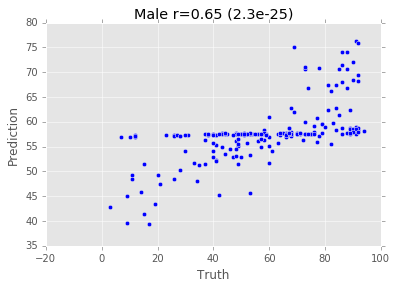

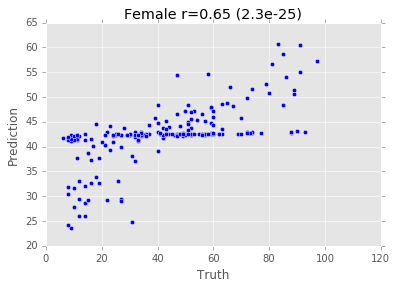

Top Coefficients for Male
pos:51263592 (34) 26257166 (32) 2557521 (30) HASHTAG_rtpodcast (26) 28870086 (24) 36362259 (21) 19426551 (21) 32765534 (20) 32135704 (19) 120943272 (19)
neg:19397785 (-32) 15846407 (-31) 21324258 (-21) 15131310 (-19) 25087685 (-19) 106837463 (-19) 38531995 (-18) 11522502 (-17) 25589776 (-17) 17093617 (-16)
Top Coefficients for Female
pos:19397785 (32) 15846407 (31) 21324258 (21) 15131310 (19) 25087685 (19) 106837463 (19) 38531995 (18) 11522502 (17) 25589776 (17) 17093617 (16)
neg:51263592 (-34) 26257166 (-32) 2557521 (-30) HASHTAG_rtpodcast (-26) 28870086 (-24) 36362259 (-21) 19426551 (-21) 32765534 (-20) 32135704 (-19) 120943272 (-19)
average correlations =  0.652213746477
Wall time: 1min 51s


([0.65221374647668096, 0.65221374647668096],
 {'Gender': {'model': MultiTaskElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001,
              fit_intercept=True, l1_ratio=0.5, max_iter=1000, n_alphas=10,
              n_jobs=1, normalize=False, random_state=None,
              selection='cyclic', tol=0.0001, verbose=0),
   'predictions': [array([ 62.8005017,  37.1994983]),
    array([ 52.22677469,  47.77322531]),
    array([ 42.7601185,  57.2398815]),
    array([ 55.28788527,  44.71211473]),
    array([ 69.45990403,  30.54009597]),
    array([ 71.36246635,  28.63753365]),
    array([ 49.29525711,  50.70474289]),
    array([ 48.01716923,  51.98283077]),
    array([ 74.03397964,  25.96602036]),
    array([ 54.91198091,  45.08801909]),
    array([ 57.09981862,  42.90018138]),
    array([ 60.91157258,  39.08842742]),
    array([ 59.05559215,  40.94440785]),
    array([ 56.27748637,  43.72251363]),
    array([ 66.11816491,  33.88183509]),
    array([ 57.58110262,  42.41889738]),
    

In [37]:
# For text plus followers features
%time do_cv(X_both[:sample_size], outputs_g, all_feats, list(brand_ids2list)[:sample_size], n_folds=2, model_f=get_model_cv)

In [351]:
# Results using followers alone:
def get_model_fol():
    return MultiTaskElasticNet(alpha=1e-5, l1_ratio=0.5)

correlations_fol, category_results_fol = do_cv(X, outputs, fol_feats,  list(brand_ids2list), model_f=get_model_fol)

predicting ['$0-50k', '$50-100k', '$100-150k', '$150k+'] for 1043 brands
fitting on 521 training and 522 testing instances
fitting on 522 training and 521 testing instances


IndexError: index 1 is out of bounds for axis 0 with size 1

predicting ['$0-50k', '$50-100k', '$100-150k', '$150k+'] for 1043 brands
fitting on 521 training and 522 testing instances
fitting on 522 training and 521 testing instances


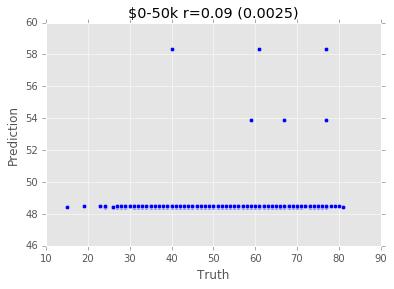

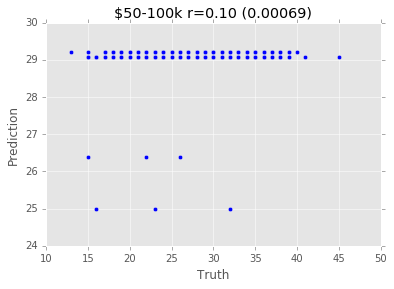

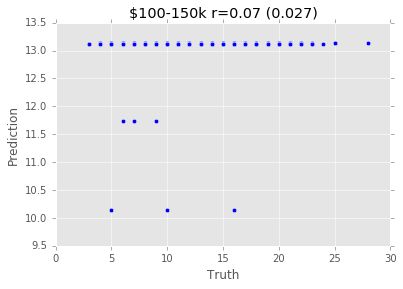

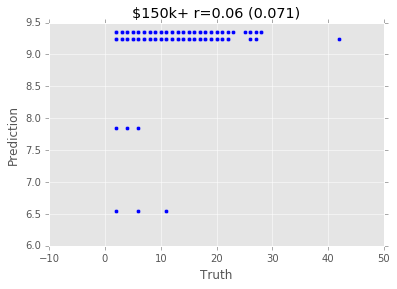

Top Coefficients for $0-50k
pos:HASHTAG_rtpodcast (7.7) ur (0) u (0) rt (0) k (0) i'm (0) THIS_IS_A_URL (0) MENTION_nochillposts (0) MENTION_leniqqua (0) MENTION_invtb (0)
neg:MENTION_filthyfrank (0) MENTION_invtb (0) MENTION_leniqqua (0) MENTION_nochillposts (0) THIS_IS_A_URL (0) i'm (0) k (0) rt (0) u (0) ur (0)
Top Coefficients for $50-100k
pos:ur (0) u (0) rt (0) k (0) i'm (0) THIS_IS_A_URL (0) MENTION_nochillposts (0) MENTION_leniqqua (0) MENTION_invtb (0) MENTION_filthyfrank (0)
neg:HASHTAG_rtpodcast (-3.5) MENTION_filthyfrank (0) MENTION_invtb (0) MENTION_leniqqua (0) MENTION_nochillposts (0) THIS_IS_A_URL (0) i'm (0) k (0) rt (0) u (0)
Top Coefficients for $100-150k
pos:ur (0) u (0) rt (0) k (0) i'm (0) THIS_IS_A_URL (0) MENTION_nochillposts (0) MENTION_leniqqua (0) MENTION_invtb (0) MENTION_filthyfrank (0)
neg:HASHTAG_rtpodcast (-2.2) MENTION_filthyfrank (0) MENTION_invtb (0) MENTION_leniqqua (0) MENTION_nochillposts (0) THIS_IS_A_URL (0) i'm (0) k (0) rt (0) u (0)
Top Coeffic

In [42]:
# Results using text alone:
def get_model_text():
    return MultiTaskElasticNet(alpha=1e-2, l1_ratio=0.5)
correlations_text, category_results_text = do_cv(X_text, outputs, text_feats,list(brand_ids2list), model_f=get_model_text)

In [ ]:
X_both2 = scale(X_both)

In [ ]:
X_both2

predicting ['$0-50k', '$50-100k', '$100-150k', '$150k+'] for 1043 brands
fitting on 521 training and 522 testing instances
fitting on 522 training and 521 testing instances


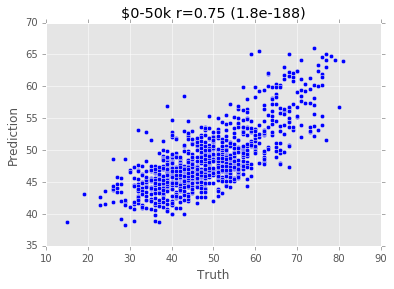

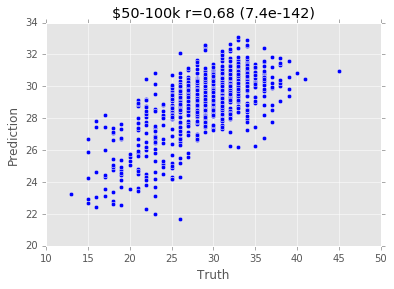

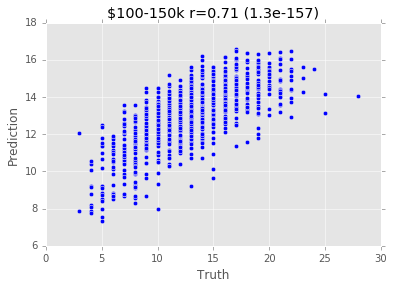

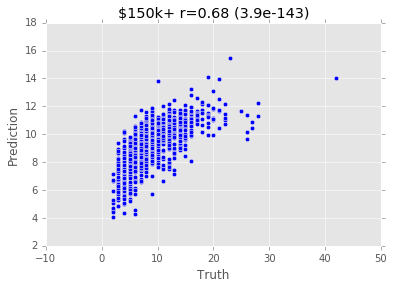

Top Coefficients for $0-50k
pos:10228272 (1.4e+02) 10671602 (1.3e+02) 18927441 (1.1e+02) 29758446 (1.1e+02) 27195114 (1.1e+02) 23151437 (1e+02) 23561980 (99) 14922225 (96) 79293791 (95) 24742040 (94)
neg:3108351 (-1.8e+02) 807095 (-1.3e+02) 2467791 (-1.2e+02) 51263592 (-1.2e+02) 5988062 (-1.2e+02) 91478624 (-1.1e+02) 51241574 (-1.1e+02) 2557521 (-1.1e+02) 120943272 (-1.1e+02) 26257166 (-1.1e+02)
Top Coefficients for $50-100k
pos:51263592 (48) 26257166 (47) 428333 (47) 2557521 (44) 120943272 (43) 51241574 (42) 15485441 (42) 1367531 (40) 19426551 (39) 5392522 (36)
neg:10671602 (-54) 29758446 (-50) 10228272 (-49) 18927441 (-47) 27195114 (-47) 23561980 (-44) 14922225 (-43) 15234657 (-40) 24742040 (-40) 5162861 (-39)
Top Coefficients for $100-150k
pos:3108351 (59) 2557521 (45) 51263592 (44) 26257166 (44) 120943272 (41) 5988062 (41) 2467791 (39) 807095 (38) 91478624 (37) 51241574 (34)
neg:10228272 (-45) 10671602 (-38) 18927441 (-36) 23151437 (-36) 29758446 (-34) 27195114 (-33) 79293791 (-32)

In [46]:
# Results using text and followers:
def get_model_both():
    return MultiTaskElasticNet(alpha=1e-5, l1_ratio=0.5)
correlations_both, category_results_both = do_cv(X_both, outputs, all_feats, list(brand_ids2list), model_f=get_model_both)

predicting ['Male', 'Female'] for 1066 brands
fitting on 533 training and 533 testing instances
fitting on 533 training and 533 testing instances
alpha chosen =  0.00023809090201 l1ratio chosen =  0.5


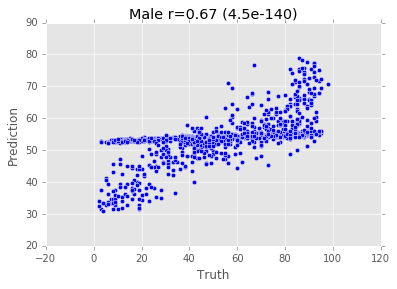

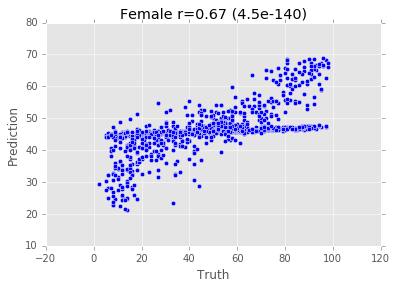

Top Coefficients for Male
pos:51263592 (52) 26257166 (51) 2557521 (49) 19426551 (36) 28870086 (36) 36362259 (32) 23083404 (31) 32765534 (31) 120943272 (31) 13213122 (29)
neg:15846407 (-57) 19397785 (-55) 21324258 (-44) 106837463 (-40) 15131310 (-36) 11522502 (-36) 20710809 (-36) 18806753 (-32) 25087685 (-31) 18676177 (-30)
Top Coefficients for Female
pos:15846407 (57) 19397785 (55) 21324258 (44) 106837463 (40) 15131310 (36) 11522502 (36) 20710809 (36) 18806753 (32) 25087685 (31) 18676177 (30)
neg:51263592 (-52) 26257166 (-51) 2557521 (-49) 19426551 (-36) 28870086 (-36) 36362259 (-32) 23083404 (-31) 32765534 (-31) 120943272 (-31) 13213122 (-29)
average correlations =  0.670432097434
Wall time: 4min 55s


([0.67043209743367815, 0.67043209743367804],
 {'Gender': {'model': MultiTaskElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001,
              fit_intercept=True, l1_ratio=0.5, max_iter=1000, n_alphas=10,
              n_jobs=1, normalize=False, random_state=None,
              selection='cyclic', tol=0.0001, verbose=0),
   'predictions': [array([ 54.82174344,  45.17825656]),
    array([ 53.71766431,  46.28233569]),
    array([ 52.84735909,  47.15264091]),
    array([ 54.12394124,  45.87605876]),
    array([ 55.4571433,  44.5428567]),
    array([ 54.78411136,  45.21588864]),
    array([ 53.5039404,  46.4960596]),
    array([ 53.65203021,  46.34796979]),
    array([ 55.35509294,  44.64490706]),
    array([ 54.12829634,  45.87170366]),
    array([ 54.37070905,  45.62929095]),
    array([ 54.18063155,  45.81936845]),
    array([ 54.31506474,  45.68493526]),
    array([ 55.14134644,  44.85865356]),
    array([ 55.48596213,  44.51403787]),
    array([ 53.84311694,  46.15688306]),
    

In [48]:
%time do_cv(X_both, outputs_g, all_feats, list(brand_ids2list), n_folds=2, model_f=get_model_cv)

In [325]:
# Re-run after scaling X_both:
correlations_both2, category_results_both2 = do_cv(X_both2, outputs, all_feats, list(brand_ids2list), model_f=get_model_both)

predicting ['$0-50k', '$50-100k', '$100-150k', '$150k+'] for 1043 brands
fitting on 521 training and 522 testing instances
fitting on 522 training and 521 testing instances
1043
average correlations =  -0.00129614606705


In [275]:
correlations_both2

[-0.0012961460670484442,
 -0.0012961460670484442,
 -0.0012961460670484442,
 -0.0012961460670484442]

In [333]:
# Then temporarily save all results
cPickle.dump((correlations_text, category_results_text, 
               correlations_fol, category_results_fol,
               correlations_both, category_results_both,
               correlations_both2, category_results_both2),
              open('results.pkl', 'wb'))


In [50]:
# Repeat with ridge.
# Followers:
def get_model_ridge():
    return Ridge(.1)
   
_, _ = do_cv(X, outputs, fol_feats, list(brand_ids2list), model_f=get_model_ridge, verbose=False)

predicting ['$0-50k', '$50-100k', '$100-150k', '$150k+'] for 1043 brands
average correlations =  0.620928055141


In [51]:
# Repeat with ridge.
# Both
_, _ = do_cv(X_both2, outputs, all_feats, list(brand_ids2list), model_f=get_model_ridge, verbose=False)

predicting ['$0-50k', '$50-100k', '$100-150k', '$150k+'] for 1043 brands
average correlations =  0.686104064468


In [336]:
# Repeat with ElasticNet
def get_model_en_fol():
    return ElasticNet(alpha=1e-5, l1_ratio=0.5)

def get_model_en_text():
    return ElasticNet(alpha=1e-5, l1_ratio=0.5)

print ('\nFriends:')
_, _ = do_cv(X, outputs, fol_feats, list(brand_ids2list), model_f=get_model_en_fol, verbose=False)
print ('\nText:')
_, _ = do_cv(X_text, outputs, text_feats, list(brand_ids2list), model_f=get_model_en_text, verbose=False)
print('\nFriends+Text:')
_, _ = do_cv(X_both2, outputs, all_feats, list(brand_ids2list), model_f=get_model_en_text, verbose=False)


Friends:
predicting ['$0-50k', '$50-100k', '$100-150k', '$150k+'] for 1043 brands


IndexError: invalid index to scalar variable.

In [96]:
# Plot scatters.
import math
from matplotlib import lines

plt.style.use('ggplot')

def nrmsd(truths, preds):
    """ Normalized root mean squared deviation. """
    return rmsd(truths, preds) / (max(truths) - min(truths))

def rmsd(truths, preds):
    """ Normalized root mean squared deviation. """
    return math.sqrt(mean_squared_error(preds, truths))

def plot_scatter_subfig(category_results, axis, category, yidx):
    results = category_results[category]
    name = outputs[category][yidx]
    preds = [p[yidx] for p in results['preds']]
    truths = [p[yidx] for p in results['truths']]

    fit = np.polyfit(truths, preds, 1)
    fit_fn = np.poly1d(fit)
    tr_extrema = [min(truths),max(truths)]
    axis.plot(tr_extrema, fit_fn(tr_extrema),'b--', linewidth=1, alpha=.5)  # , color='#9C9C9C')
    axis.plot(truths, preds, 'bo', alpha=.5, ms=2)
    #axis.plot(truths, preds, 'o', truths, fit_fn(truths), 'k', linewidth=1.1,
    #          ms=2, markerfacecolor='None', markeredgecolor='b')
    axis.set_title('%s\n$r=%.2f$' % (name, pearsonr(preds, truths)[0]), size=14)
    axis.locator_params(nbins=5, tight=True) 
    mean = np.mean(truths)
    start, end = axis.get_xlim()

KeyError: 'Politics'

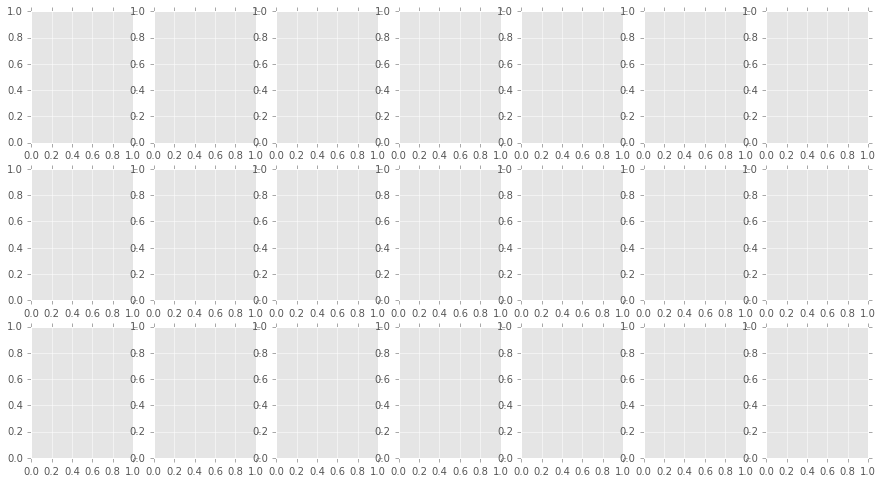

In [329]:
def make_scatters_fig(category_results):
    figure, axes = plt.subplots(3, 7, figsize=(15,8))
    # Row 1
    plot_scatter_subfig(category_results, axes[0][0], 'Politics', 0)
    plot_scatter_subfig(category_results, axes[0][1], 'Politics', 1)
    plot_scatter_subfig(category_results, axes[0][2], 'Gender', 0)        
    plot_scatter_subfig(category_results, axes[0][3], 'Income', 0)
    plot_scatter_subfig(category_results, axes[0][4], 'Income', 1)
    plot_scatter_subfig(category_results, axes[0][5], 'Income', 2)
    plot_scatter_subfig(category_results, axes[0][6], 'Income', 3)
    # Row 2
    for i in range(6):
        plot_scatter_subfig(category_results, axes[1][i], 'Age', i)        
    plot_scatter_subfig(category_results, axes[1][6], 'Children', 0)    

    # Row 3
    for i in range(4):
        plot_scatter_subfig(category_results, axes[2][i], 'Ethnicity', i)
    plot_scatter_subfig(category_results, axes[2][4], 'Education', 0)
    plot_scatter_subfig(category_results, axes[2][5], 'Education', 1)
    plot_scatter_subfig(category_results, axes[2][6], 'Education', 2)

    axes[0, 1].text(-.05, 1.35, 'Politics',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=18, weight='bold', transform=axes[0, 1].transAxes)
    axes[0, 2].text(.5, 1.35, 'Gender',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=18, weight='bold', transform=axes[0, 2].transAxes)
    axes[0, 4].text(1.1, 1.35, 'Income',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=18, weight='bold', transform=axes[0, 4].transAxes)
    axes[1, 2].text(1.1, 1.3, 'Age',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=18, weight='bold', transform=axes[1, 2].transAxes)
    axes[1, 6].text(.5, 1.32, 'Family',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=18, weight='bold', transform=axes[1, 6].transAxes)
    axes[2, 1].text(1.1, 1.32, 'Ethnicity',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=18, weight='bold', transform=axes[2, 1].transAxes)
    axes[2, 5].text(.5, 1.32, 'Education',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=18, weight='bold', transform=axes[2, 5].transAxes)

    axes[1][0].set_ylabel('Predicted Value (%)', size=18)
    plt.figtext(0.5,.01,"True Value (%)",fontdict={'fontsize':18}, verticalalignment='top', horizontalalignment='center')
    # figure.set_size_inches(12,8)
    figure.tight_layout()
    plt.subplots_adjust(hspace=.7)   
    figure.show()
    plt.savefig('scatters.png', bbox_inches='tight')
make_scatters_fig(category_results_both2)

In [337]:
category_results_text

{'Income': {'model': MultiTaskElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
            max_iter=1000, normalize=False, random_state=None,
            selection='cyclic', tol=0.0001, warm_start=False),
  'predictions': [array([ 48.4209179 ,  29.2124264 ,  13.1304157 ,   9.24586544]),
   array([ 48.4209179 ,  29.2124264 ,  13.1304157 ,   9.24586544]),
   array([ 48.4209179 ,  29.2124264 ,  13.1304157 ,   9.24586544]),
   array([ 48.4209179 ,  29.2124264 ,  13.1304157 ,   9.24586544]),
   array([ 48.4209179 ,  29.2124264 ,  13.1304157 ,   9.24586544]),
   array([ 48.4209179 ,  29.2124264 ,  13.1304157 ,   9.24586544]),
   array([ 48.4209179 ,  29.2124264 ,  13.1304157 ,   9.24586544]),
   array([ 48.4209179 ,  29.2124264 ,  13.1304157 ,   9.24586544]),
   array([ 48.4209179 ,  29.2124264 ,  13.1304157 ,   9.24586544]),
   array([ 48.4209179 ,  29.2124264 ,  13.1304157 ,   9.24586544]),
   array([ 48.4209179 ,  29.2124264 ,  13.1304157 ,   9.24586544]),
   array([ 

## Then, we need to perform regression

In [ ]:
# Print the top features.
from collections import defaultdict
from twutil import collect

def get_top_user_ids(category_results, feats):
    id_list = []
    top_user_ids = defaultdict(lambda: defaultdict(lambda: []))
    for category in category_results:
        results = category_results[category]
        coef = results['model'].coef_
        for yi, ylabel in enumerate(outputs[category]):
            topi = np.argsort(coef[yi])[::-1][:5]
            print category, ylabel, ' '.join('%d' % x for x in feats[topi])
            id_list.extend(feats[topi])
            top_user_ids[category][ylabel] = feats[topi]
    return top_user_ids, id_list

def get_top_user_names(category_results, feats):
    top_user_ids, id_list = get_top_user_ids(category_results, feats)
    user_names = collect.lookup_handles(id_list)
    id2user = dict([(int(x[1]), x[0]) for x in user_names])
    for category in top_user_ids:
        for label in top_user_ids[category]:
            top_user_ids[category][label] = [id2user[x] for x in top_user_ids[category][label] if x  in id2user]
    return top_user_ids

top_users = get_top_user_names(category_results_fol, fol_feats)

In [ ]:
import tabulate

In [ ]:
from tabulate import tabulate
for label, values in top_users.iteritems():
    print tabulate(values, headers=values.keys())
    print

## Do Next Step

In [100]:
data_2 = []
with open('labeled_tweets.json',encoding='utf-8-sig') as data_file:
    for line in data_file:
        count = count+1
        if count > 1000000:
            break;
        data_2.append(line)
data_22 = []
for i in range(len(data)):
    tempt_dict = {}
    tempt_dict = ast.literal_eval(data[i])
    data_22.append(tempt_dict.copy())
data_22

[{'text': 'RT @FilthyFrank: lmfao http://t.co/BCGl8P2WI1',
  'user': {'id': 553810842,
   'id_str': '553810842',
   'screen_name': 'Sebastiancovar'}},
 {'text': 'RT @FilthyFrank: https://t.co/ZoB35kVo6j',
  'user': {'id': 553810842,
   'id_str': '553810842',
   'screen_name': 'Sebastiancovar'}},
 {'text': 'RT @NoChillPosts: LMAO DUMBASS http://t.co/8pTfluFnk4',
  'user': {'id': 553810842,
   'id_str': '553810842',
   'screen_name': 'Sebastiancovar'}},
 {'text': 'RT @NoChillPosts: CRYING http://t.co/dC64qtckZZ',
  'user': {'id': 553810842,
   'id_str': '553810842',
   'screen_name': 'Sebastiancovar'}},
 {'text': 'RT @NoChillPosts: ALL SHE WANTED TO DO WAS GO BACK HOME TO TEXAS http://t.co/7cAT2FEItF',
  'user': {'id': 553810842,
   'id_str': '553810842',
   'screen_name': 'Sebastiancovar'}},
 {'text': '@Stormsy710 Stfu',
  'user': {'id': 553810842,
   'id_str': '553810842',
   'screen_name': 'Sebastiancovar'}},
 {'text': "RT @Stormsy710: I hope you aren't saying pansexualism is bad #RTP

In [102]:
if False:  # parse raw tweets
    race_users_text = []
    X_race_text = text_vec.transform(data_2i['text'] for data_2i in data_22
                                if not race_users_text.append(data_2i['user']['id_str']))
    cPickle.dump((race_users_text, X_race_text), open('race_text_data.pkl', 'wb'))
else:
    f = open('race_text_data.pkl', 'rb')# unpickle
    race_users_text, X_race_text = pickle.load(f,encoding='latin1')

In [103]:
print(X_race_text.shape)
print(race_users_text[:10])

(509, 112642)
['0412cristian', '14feernandaa', '1dtampa', '24baumann', '2throwedyoungin', '4ever_moore', '4theluvofalicia', '8a_juanpp', '__dtdm__', '__kayshaa']


In [106]:
# Read follower features.
from collections import Counter

def map_race_label(label):
    return ['white', 'latin', 'black'].index(label)

def read_labeled_data_fol(fname, label_map_f, vec):
    users = []
    labels = []
    friends = []
    for line in open(fname):
        parts = line.strip().split()
        if len(parts) > 10:
            users.append(parts[0])
            labels.append(label_map_f(parts[1]))
            friends.append(Counter([int(x) for x in parts[2:]]))
    X_race = vec.transform(friends)
    return users, npa(labels), X_race

race_users_fol, y_race, X_race_fol = read_labeled_data_fol('race.txt', map_race_label, vec)

In [107]:
print(race_users_fol[:10])
print('race distribution:', Counter(y_race).most_common(5))

['surnpolitics', 'livingpeace_', 'julianpatrickr', 'jmdheisman', 'frm_atlanta', 'prettygiirl_ri', 'bitchesloveshan', 'g_luminati93', 'golden_ovo', 'welsh_boyy']
race distribution: [(0, 265), (2, 221), (1, 129)]


In [109]:
# sort text and follower instances to be in same order.
race_users = sorted(list(set(race_users_text) & set(race_users_fol)))
print(len(race_users_text), 'users from text, ', len(race_users_fol), 'from followers, ', len(race_users), 'on both')
X_race_fol2 = X_race_fol[[race_users_fol.index(u) for u in race_users]]
y_race2 = y_race[[race_users_fol.index(u) for u in race_users]]
X_race_text2 = X_race_text[[race_users_text.index(u) for u in race_users]]

509 users from text,  615 from followers,  509 on both


In [111]:
import scipy
X_race_both2 = scipy.sparse.hstack((X_race_fol2, X_race_text2)).tocsr()
print(X_race_fol2.shape)
print(X_race_text2.shape)
print(X_race_both2.shape)
print(len(y_race2))

(509, 46649)
(509, 112642)
(509, 159291)
509


In [238]:
import random

# random now contains the stdlib random package

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize

def label_by_clf(X_race, y_race, pct):
    clf = LogisticRegression()
    cv = KFold(len(y_race), 3, shuffle=True, random_state=123456)
    preds = np.zeros(len(y_race), int)
    for train, test in cv:
        train = np.random.choice(train, int(len(train) * pct))
        clf.fit(X_race[train], y_race[train])
        preds[test] = clf.predict(X_race[test])
    return preds

def label_by_reg_helper(X, m, label_indices=None, standardize_coef=True, rm_neg_coef=True):
    """ Scale coefficients per class to make them comparable;
    then keep only positive coefficients. """
    if not label_indices:
        label_indices = range(len(m.coef_))
    coef = m.coef_[label_indices]
    if standardize_coef:
        coef = scale(coef, axis=1)  # Scale by class label
    if rm_neg_coef:
        for i in range(len(coef)):
            topi = np.where(coef[i] > 0)
            topv = coef[i][topi]
            coef[i] = [0] * len(coef[i])
            coef[i][topi] = topv
    return safe_sparse_dot(coef, X.T, dense_output=True).T

def label_by_reg(X, m, label_indices=None, standardize_coef=True, rm_neg_coef=True):
    probs = label_by_reg_helper(X, m, label_indices, standardize_coef, rm_neg_coef)
    return np.argmax(probs, axis=1)

def label_by_reg_both(X1, X2, m1, m2, label_indices=None, standardize_coef=True, rm_neg_coef=True):
    """ Combine two regression models by scaling their outputted dot products and summing. """
    probs1 = label_by_reg_helper(X1, m1, label_indices, standardize_coef, rm_neg_coef)
    probs2 = label_by_reg_helper(X2, m2, label_indices, standardize_coef, rm_neg_coef)
    probs1 = scale(probs1)
    probs2 = scale(probs2)
    return np.argmax(probs1 + probs2, axis=1)


def eval_labeled(truth, pred, labels):
    label_idx = np.arange(len(labels))
    acc, f1 = (accuracy_score(pred, truth),
                       f1_score(truth, pred, labels=label_idx,
                                average='macro', pos_label=None))
    print('acc=', acc, 'f1=', f1)
    # print confusion_matrix(truth, pred)
    return f1

In [168]:
id2brand[17448965]['demo'].keys()

dict_keys(['Other', 'brand', 'Female 55-64', 'Male < 18', 'Female 35-44', 'Inactive', '18-24', '$50-100k', 'Female 25-34', 'African American', 'Republican', 'Caucasian', 'Male 18-24', 'Male 45-54', 'No Kids', 'Male 65+', 'Has Kids', 'Female < 18', '$150k+', '65+', 'Male 55-64', 'Somewhat Active', 'Active', 'Independent', '< 18', '$0-50k', 'Male 25-34', '55-64', 'No College', 'College', 'Hispanic', 'Female', '25-34', 'Female 65+', '35-44', 'Female 45-54', 'Female 18-24', 'Male', 'Asian', 'Democrat', '45-54', 'twitter', 'Grad School', 'Male 35-44', '$100-150k'])

In [226]:
from sklearn.preprocessing import Imputer
import sklearn.preprocessing as sp
from numpy import *
import numpy as np
# Retrain race models from distant supervision
def train_demo_model(X, ylabels, id2brand, model_f):
    indices = [i for i, bid in enumerate(id2brand) if len(set(ylabels) & set(id2brand[bid]['demo'].keys())) == len(ylabels)]
    print('training race model on', len(indices), 'brands')
    y = npa([get_yvalues(ylabels, id2brand[list(brand_ids2list)[bid]]['demo']) for bid in indices])
    m = model_f() # MultiTaskElasticNet(alpha=1e-5, l1_ratio=0.5)
    X[np.isnan(X)] = 0
    X[np.isfinite(X)] = 0
    y = Imputer().fit_transform(y)
    m.fit(X[len(scale(y))],(scale(y)))
    return m

race_labels = ['Caucasian', 'Hispanic', 'African American']
race_model_fol = train_demo_model(X, race_labels, id2brand, get_model_fol)
race_model_text = train_demo_model(X_text, race_labels, id2brand, get_model_text)
race_model_both = train_demo_model(X_both2, race_labels, id2brand, get_model_both)

training race model on 1035 brands


C:\Users\shou\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\shou\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\shou\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


training race model on 1035 brands


C:\Users\shou\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\shou\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\shou\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


training race model on 1035 brands


C:\Users\shou\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\shou\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\shou\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [239]:
def eval_labeled_all(y, X_fol, X_text, X_both, labels, label_indices, 
                     model_fol, model_text, model_both,
                     standardize_coef, rem_neg_coef):    
    f1s = []
    print('distant, followers:')
    f1s.append(eval_labeled(y, label_by_reg(X_fol, model_fol, label_indices, standardize_coef, rem_neg_coef), labels))
    print('distant, text:')
    f1s.append(eval_labeled(y, label_by_reg(X_text, model_text, label_indices, standardize_coef, rem_neg_coef), labels)) 
    print('distant, both (two models):')
    f1s.append(eval_labeled(y, label_by_reg_both(X_fol, X_text, model_fol, model_text, label_indices, standardize_coef, rem_neg_coef), labels)) 
    print('distant, both (single model):')
    f1s.append(eval_labeled(y, label_by_reg(X_both, model_both, label_indices, standardize_coef, rem_neg_coef), labels)) 
    print('max f1=', max(f1s), 'avg f1=', np.mean(f1s))

def eval_labeled_all_sup(y, X_fol, X_text, X_both, labels):
    f1s = []
    print('supervised, followers:')
    f1s.append(eval_labeled(y, label_by_clf(X_fol, y, 1), labels))
    print('supervised, text:')
    f1s.append(eval_labeled(y, label_by_clf(X_text, y, 1), labels))
    print('supervised, both:')
    f1s.append(eval_labeled(y, label_by_clf(X_both, y, 1), labels))
    print('max f1=', max(f1s), 'avg f1=', np.mean(f1s))

In [240]:
eval_labeled_all_sup(y_race2, X_race_fol2, X_race_text2, X_race_both2, race_labels)

supervised, followers:
acc= 0.648330058939 f1= 0.624088189493
supervised, text:
acc= 0.864440078585 f1= 0.86006006006
supervised, both:
acc= 0.864440078585 f1= 0.861463659859
max f1= 0.861463659859 avg f1= 0.781870636471


In [244]:
category_results_fol

{'Income': {'model': MultiTaskElasticNet(alpha=1e-05, copy_X=True, fit_intercept=True,
            l1_ratio=0.5, max_iter=1000, normalize=False, random_state=None,
            selection='cyclic', tol=0.0001, warm_start=False),
  'predictions': [array([ 38.88054946,  30.58787499,  16.39663441,  14.13456477]),
   array([ 47.65476489,  29.29182517,  13.35705523,   9.70590326]),
   array([ 47.42175875,  30.26214281,  13.23032411,   9.02736613]),
   array([ 48.91361836,  29.78459959,  12.98057567,   8.28914439]),
   array([ 44.9978913 ,  30.64364494,  14.43170796,   9.94062991]),
   array([ 47.78739893,  29.21291158,  13.51049348,   9.50460355]),
   array([ 51.88162244,  28.47124089,  11.77435881,   7.8763306 ]),
   array([ 48.92474598,  29.72427339,  12.73662168,   8.57498175]),
   array([ 45.04750323,  30.31440753,  14.2444249 ,  10.34712527]),
   array([ 47.03192629,  29.27134103,  13.61673022,  10.1277384 ]),
   array([ 46.4673617 ,  28.75607534,  13.87850055,  10.8746365 ]),
   array([

In [276]:
# Race results for original regression models.
for std_coef, rem_neg in [[True, True], [True, False], [False, True], [False, False]]:
    print('\nstd coef=', std_coef, 'rem neg=', rem_neg)
    eval_labeled_all(y_race2, X_race_fol2, X_race_text2, X_race_both2, race_labels, [0,1,2],
            category_results_fol['Income']['model'],
            category_results_text['Income']['model'],
            category_results_both2['Income']['model'],
            standardize_coef=std_coef, rem_neg_coef=rem_neg)


std coef= True rem neg= True
distant, followers:
acc= 0.335952848723 f1= 0.230145001986
distant, text:


ValueError: dimension mismatch

## Do the experiment on genders

In [280]:
def map_gender_label(label):
    return ['Male', 'Female'].index(label)

gender_labels = ['Male', 'Female']
gender_users_fol, y_gender, X_gender_fol = read_labeled_data_fol('gender.txt', map_gender_label, vec)
gender_users = sorted(list(set(race_users_text) & set(gender_users_fol)))
print(len(race_users_text), 'users from text, ', len(gender_users_fol), 'from followers, ', len(gender_users), 'on both')
X_gender_fol = X_gender_fol[[gender_users_fol.index(u) for u in gender_users]]
y_gender = y_gender[[gender_users_fol.index(u) for u in gender_users]]
X_gender_text = X_race_text[[race_users_text.index(u) for u in gender_users]]
X_gender_both = scipy.sparse.hstack((X_gender_fol, X_gender_text)).tocsr()
print(X_gender_fol.shape)
print(X_gender_text.shape)
print(X_gender_both.shape)
print(len(y_gender))

509 users from text,  213 from followers,  175 on both
(175, 46649)
(175, 112642)
(175, 159291)
175


In [281]:
gender_model_fol = train_demo_model(X, gender_labels, id2brand, get_model_fol)
gender_model_text = train_demo_model(X_text, gender_labels, id2brand, get_model_text)
gender_model_both = train_demo_model(X_both2, gender_labels, id2brand, get_model_both)

training race model on 1066 brands


C:\Users\shou\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\shou\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\shou\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


training race model on 1066 brands


C:\Users\shou\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\shou\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\shou\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


training race model on 1066 brands


C:\Users\shou\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\shou\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\shou\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [282]:
eval_labeled_all_sup(y_gender, X_gender_fol, X_gender_text, X_gender_both, gender_labels)

supervised, followers:
acc= 0.691428571429 f1= 0.657608695652
supervised, text:
acc= 0.805714285714 f1= 0.793230469836
supervised, both:
acc= 0.811428571429 f1= 0.799902983265
max f1= 0.799902983265 avg f1= 0.750247382918


In [323]:
# Gender results for regression models retrained after scaling y.
for std_coef, rem_neg in [[True, True], [True, False], [False, True], [False, False]]:
    print('\nstd coef=', std_coef, 'rem neg=', rem_neg)
    eval_labeled_all(y_gender, X_gender_fol, X_gender_text, X_gender_both, gender_labels, [0,1],
                gender_model_fol, gender_model_text, gender_model_both,
                    std_coef, rem_neg)


std coef= True rem neg= True
distant, followers:
acc= 0.428571428571 f1= 0.3
distant, text:


C:\Users\shou\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ValueError: dimension mismatch

In [324]:
category_results_both2

{'Income': {'model': MultiTaskElasticNet(alpha=1e-05, copy_X=True, fit_intercept=True,
            l1_ratio=0.5, max_iter=1000, normalize=False, random_state=None,
            selection='cyclic', tol=0.0001, warm_start=False),
  'predictions': [array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   array([ 48.47792706]),
   a

In [315]:
# Gender results for original regression models
for std_coef, rem_neg in [[True, True], [True, False], [False, True], [False, False]]:
    print('\nstd coef=', std_coef, 'rem neg=', rem_neg)
    eval_labeled_all(y_gender, X_gender_fol.todense(), X_gender_text.todense(), X_gender_both.todense(), gender_labels, [0,1],
                category_results_fol['Income']['model'],
                category_results_text['Income']['model'],
                category_results_both2['Income']['model'],
                std_coef, rem_neg)


std coef= True rem neg= True
distant, followers:
acc= 0.308571428571 f1= 0.295317647842
distant, text:


ValueError: shapes (2,11) and (112642,175) not aligned: 11 (dim 1) != 112642 (dim 0)